<a href="https://colab.research.google.com/github/AlmahdiPen/Visi_Komputer_TI-2A/blob/main/klasifikasi_gambar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Praktikum D1 – Memulai Klasifikasi Gambar dengan Dataset Sederhana


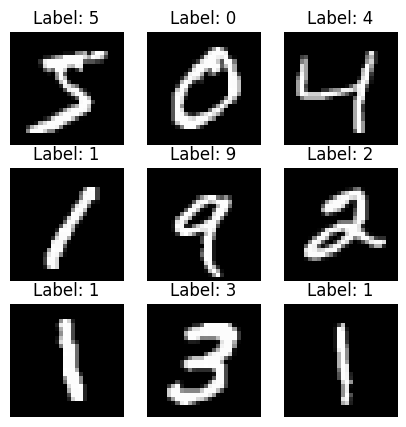

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Tampilkan contoh
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

Praktikum D2 – Klasifikasi Gambar dengan Model Machine Learning Tradisional

In [60]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# Flatten
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0

# SVM
clf = svm.SVC(kernel='linear', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000]) # gunakan subset karena SVM berat
y_pred = clf.predict(x_test_flat)
print("Akurasi:", accuracy_score(y_test, y_pred))

Akurasi: 0.9101


Praktikum D3 – Membangun CNN Sederhana

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8880 - loss: 0.3709 - val_accuracy: 0.9795 - val_loss: 0.0722
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9793 - loss: 0.0703 - val_accuracy: 0.9852 - val_loss: 0.0568
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9858 - loss: 0.0432 - val_accuracy: 0.9852 - val_loss: 0.0512
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9911 - loss: 0.0280 - val_accuracy: 0.9877 - val_loss: 0.0478
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9931 - loss: 0.0209 - val_accuracy: 0.9867 - val_loss: 0.0512


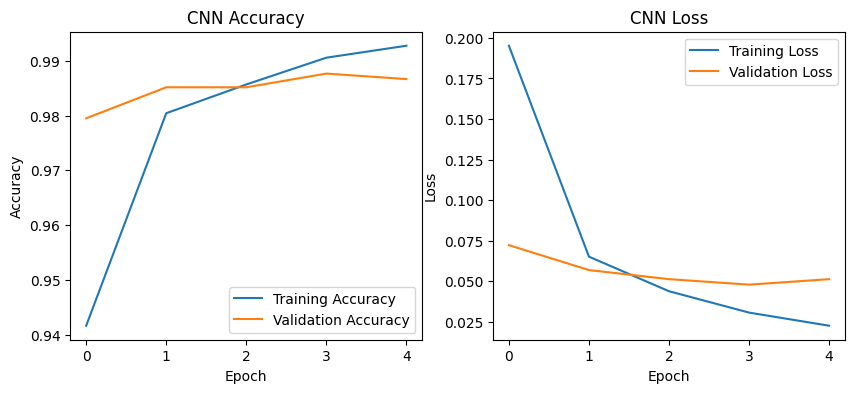

In [61]:
import tensorflow as tf
from tensorflow.keras import layers, models

x_train_cnn = x_train.reshape(-1,28,28,1) / 255.0
x_test_cnn = x_test.reshape(-1,28,28,1) / 255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)

# ===== Plot history =====
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Praktikum D4 – Eksperimen dengan Dataset Lebih Kompleks (CIFAR-10)

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.3630 - loss: 1.7504 - val_accuracy: 0.5678 - val_loss: 1.2252
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5823 - loss: 1.1822 - val_accuracy: 0.6360 - val_loss: 1.0598
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6422 - loss: 1.0224 - val_accuracy: 0.6552 - val_loss: 1.0161
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6712 - loss: 0.9436 - val_accuracy: 0.6860 - val_loss: 0.9495
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7001 - loss: 0.8662 - val_accuracy: 0.6942 - val_loss: 0.8877
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7261 - loss: 0.7997 - val_accuracy: 0.6636 - val_loss: 0.9993
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7393 - loss: 0.7475 - val_accuracy: 0.7050 - val_loss: 0.8758
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7594 - loss: 0.6958 

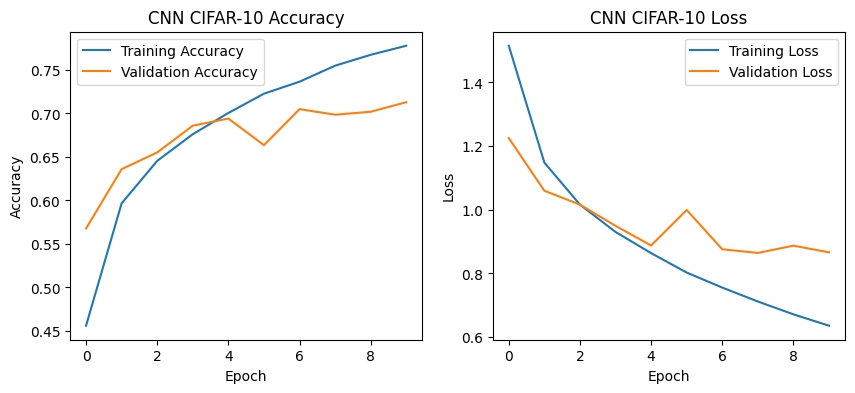

In [62]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# ===== Plot history =====
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Praktikum D5 – Transfer Learning dengan Model Pra-Latih

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.4532 - loss: 1.5575 - val_accuracy: 0.5676 - val_loss: 1.2287
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.5809 - loss: 1.2137 - val_accuracy: 0.5868 - val_loss: 1.1754
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.5976 - loss: 1.1459 - val_accuracy: 0.5938 - val_loss: 1.1561
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.6161 - loss: 1.1084 - val_accuracy: 0.6046 - val_loss: 1.1331
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.6196 - loss: 1.0756 - val_accuracy: 0.6140 - val_loss: 1.1138


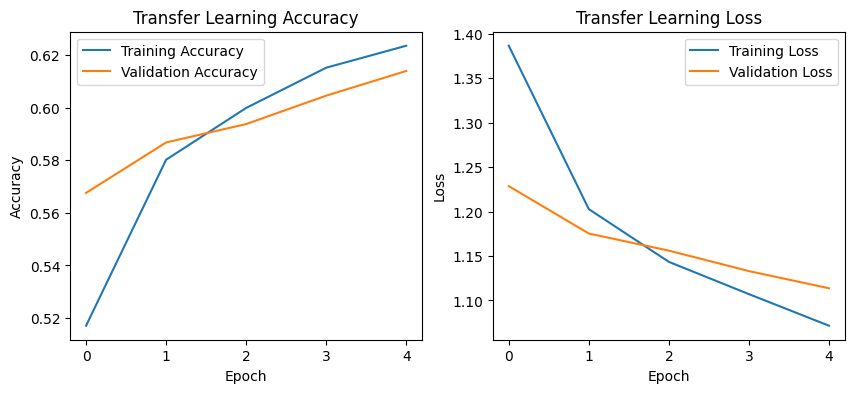

In [63]:
from tensorflow.keras.applications import VGG16
base_model = VGG16(weights='imagenet', include_top=False,
                   input_shape=(32,32,3))
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# ===== Plot history =====
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Transfer Learning Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Praktikum D6 – Evaluasi dengan Confusion Matrix dan Metrik Lain

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step
              precision    recall  f1-score   support

           0       0.75      0.56      0.64      1000
           1       0.61      0.71      0.66      1000
           2       0.54      0.47      0.50      1000
           3       0.45      0.36      0.40      1000
           4       0.53      0.53      0.53      1000
           5       0.52      0.56      0.54      1000
           6       0.57      0.70      0.63      1000
           7       0.63      0.68      0.65      1000
           8       0.65      0.77      0.70      1000
           9       0.65      0.55      0.60      1000

    accuracy                           0.59     10000
   macro avg       0.59      0.59      0.59     10000
weighted avg       0.59      0.59      0.59     10000



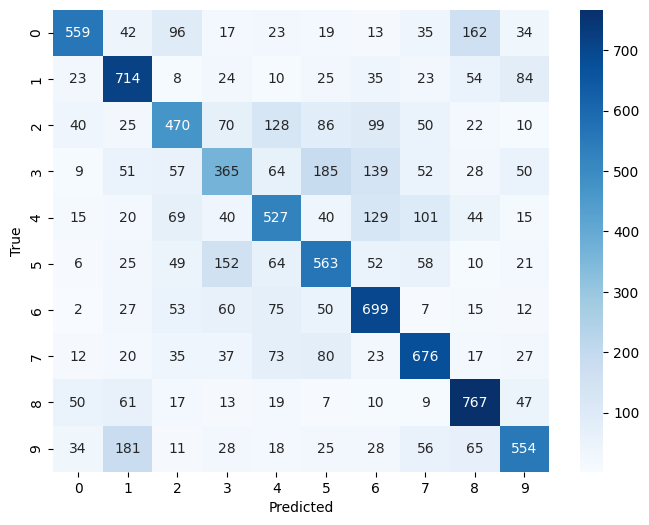

In [64]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_pred = model.predict(x_test).argmax(axis=1)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

penugasan


In [69]:
# ===== 1) Upload file foto tulisan angka =====
from google.colab import files
uploaded = files.upload() # pilih 1 atau lebih file gambar (jpg/png)

# ===== 2) Utilitas Preprocess agar mirip MNIST (28x28, putih-di-atas hitam) =====
import numpy as np
from PIL import Image, ImageOps

def preprocess_to_mnist_28x28(img_pil):
    """
    Langkah:
    - Konversi ke grayscale
    - Auto-contrast
    - (Opsional) invert bila latar terang (agar digit jadi putih, latar jadi gelap seperti MNIST)
    - Crop ke bounding box digit
    - Resize mempertahankan rasio ke (20x20), lalu pad ke (28x28)
    - Normalisasi ke [0,1] dan tambah axis channel
    """
    # Grayscale + autocontrast
    img = img_pil.convert('L')
    img = ImageOps.autocontrast(img)
    arr = np.array(img).astype(np.uint8)

    # Jika rata-rata terang (kertas putih), invert supaya digit menjadi putih di atas latar gelap (gaya MNIST)
    if arr.mean() > 127:
        img = ImageOps.invert(img)
    arr = np.array(img)

    # Binarisasi ringan untuk cari bbox digit
    thr = np.mean(arr) * 0.8 # ambang adaptif sederhana
    mask = arr > thr
    if mask.any():
        ys, xs = np.where(mask)
        y0, y1 = ys.min(), ys.max()
        x0, x1 = xs.min(), xs.max()
        img = img.crop((x0, y0, x1+1, y1+1))

    # Resize to 32x32 and convert to RGB
    img = img.resize((32, 32), Image.Resampling.LANCZOS)
    img = img.convert('RGB')

    # Normalisasi ke [0,1]
    arr = np.array(img).astype('float32') / 255.0

    # No need to add channel dim, already 3 channels
    return img, arr

Saving Gambar WhatsApp 2025-09-21 pukul 19.44.05_43a4b23d.jpg to Gambar WhatsApp 2025-09-21 pukul 19.44.05_43a4b23d.jpg
Saving Gambar WhatsApp 2025-09-21 pukul 19.44.05_397c4ba5.jpg to Gambar WhatsApp 2025-09-21 pukul 19.44.05_397c4ba5 (1).jpg
Saving Gambar WhatsApp 2025-09-21 pukul 19.47.39_e5f2591f.jpg to Gambar WhatsApp 2025-09-21 pukul 19.47.39_e5f2591f (1).jpg


##CNN


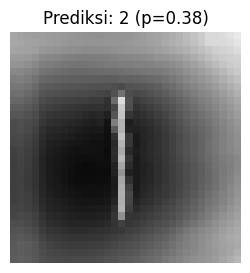

Rekap Prediksi (CNN):
- Gambar WhatsApp 2025-09-21 pukul 19.44.05_43a4b23d.jpg -> 2 (p=0.430)
- Gambar WhatsApp 2025-09-21 pukul 19.44.05_397c4ba5 (1).jpg -> 3 (p=0.409)
- Gambar WhatsApp 2025-09-21 pukul 19.47.39_e5f2591f (1).jpg -> 2 (p=0.379)


In [70]:
import matplotlib.pyplot as plt
results = []
for fname in uploaded.keys():
    img_pil = Image.open(fname)
    disp, x = preprocess_to_mnist_28x28(img_pil) # disp: PIL untuk ditampilkan, x: (28,28,1)
    x_batch = np.expand_dims(x, axis=0) # (1,28,28,1)
    probs = model.predict(x_batch, verbose=0)[0] # shape (10,)
    pred = int(np.argmax(probs))
    conf = float(np.max(probs))
    results.append((fname, pred, conf))

# Tampilkan hasil
plt.figure(figsize=(3,3))
plt.imshow(disp, cmap='gray')
plt.title(f"Prediksi: {pred} (p={conf:.2f})")
plt.axis('off')
plt.show()

# Rekap ringkas
print("Rekap Prediksi (CNN):")
for r in results:
    print(f"- {r[0]} -> {r[1]} (p={r[2]:.3f})")

##SVM

In [72]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

results = []
for fname in uploaded.keys():
    img_pil = Image.open(fname)
    _, x = preprocess_for_svm(img_pil) # x: (28,28) float [0,1]
    x_flat = x.reshape(1, -1) # (1,784)
    pred = int(clf.predict(x_flat)[0])

    # SVM default tidak punya proba kecuali SVC(probability=True). Jika Anda ingin probabilitas:
    # clf = svm.SVC(kernel='rbf', gamma='scale', probability=True) saat pelatihan.
    conf = None
    try:
        if hasattr(clf, "predict_proba"):
            conf = float(np.max(clf.predict_proba(x_flat)))
    except Exception:
        pass
    results.append((fname, pred, conf))

# Tampilkan hasil (gunakan gambar 28x28 yang sudah diproses di tahap CNN juga boleh)
for r in results:
    print(f"{r[0]} -> Prediksi SVM: {r[1]}" + (f" (p≈{r[2]:.2f})" if r[2] is not None else ""))

# Optional: display the preprocessed image
# plt.figure(figsize=(3,3))
# plt.imshow(disp, cmap='gray')
# plt.title(f"Prediksi SVM: {pred}")
# plt.axis('off')
# plt.show()

Gambar WhatsApp 2025-09-21 pukul 19.44.05_43a4b23d.jpg -> Prediksi SVM: 2
Gambar WhatsApp 2025-09-21 pukul 19.44.05_397c4ba5 (1).jpg -> Prediksi SVM: 3
Gambar WhatsApp 2025-09-21 pukul 19.47.39_e5f2591f (1).jpg -> Prediksi SVM: 5
